## The analysis of categorical data

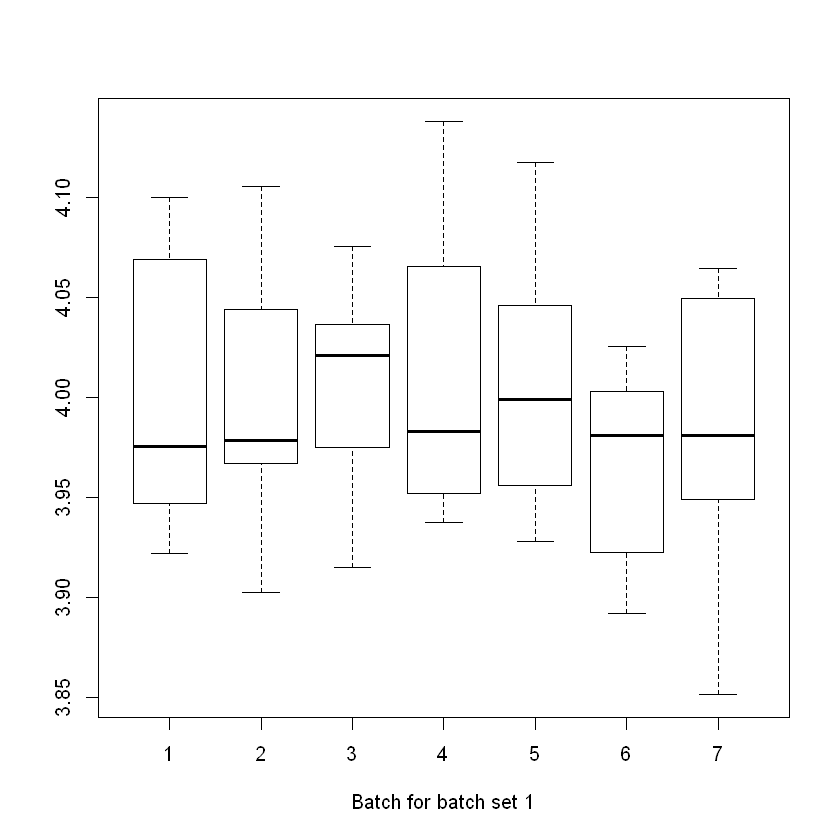

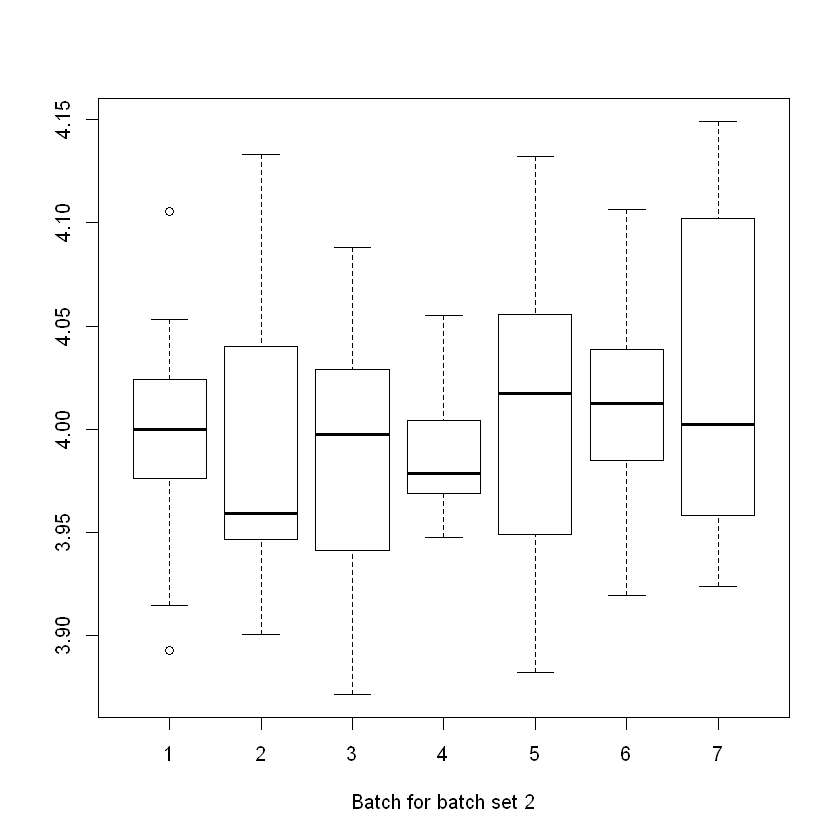

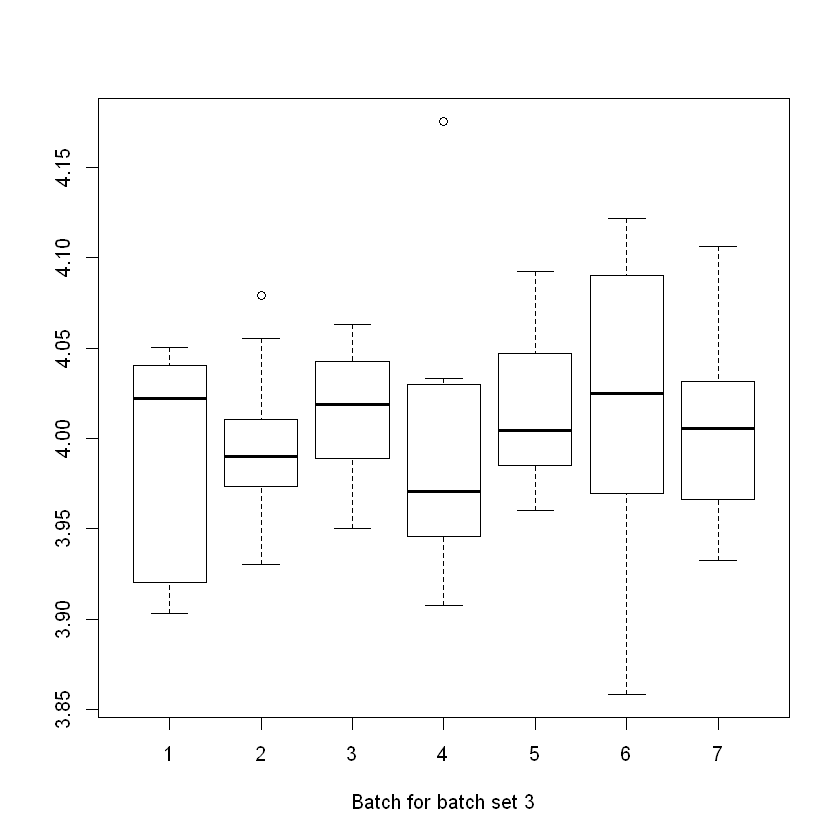

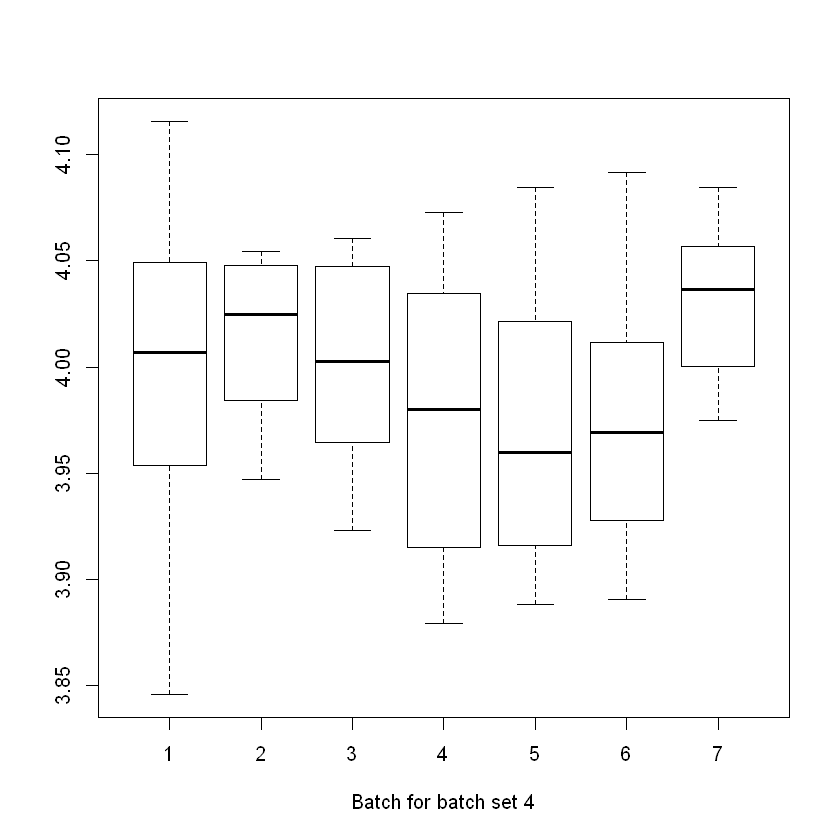

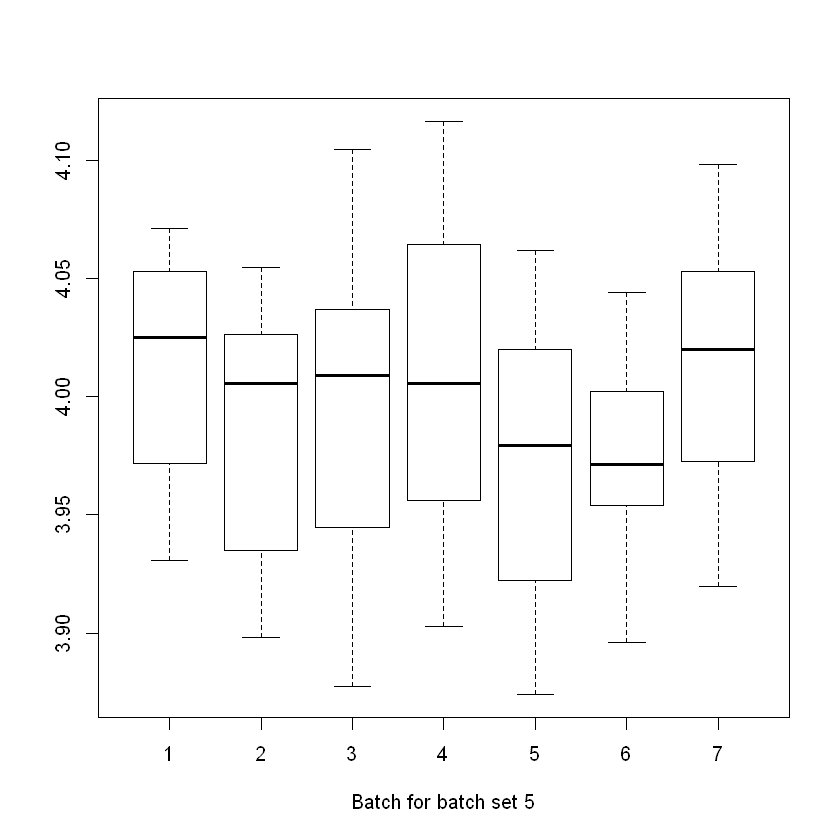

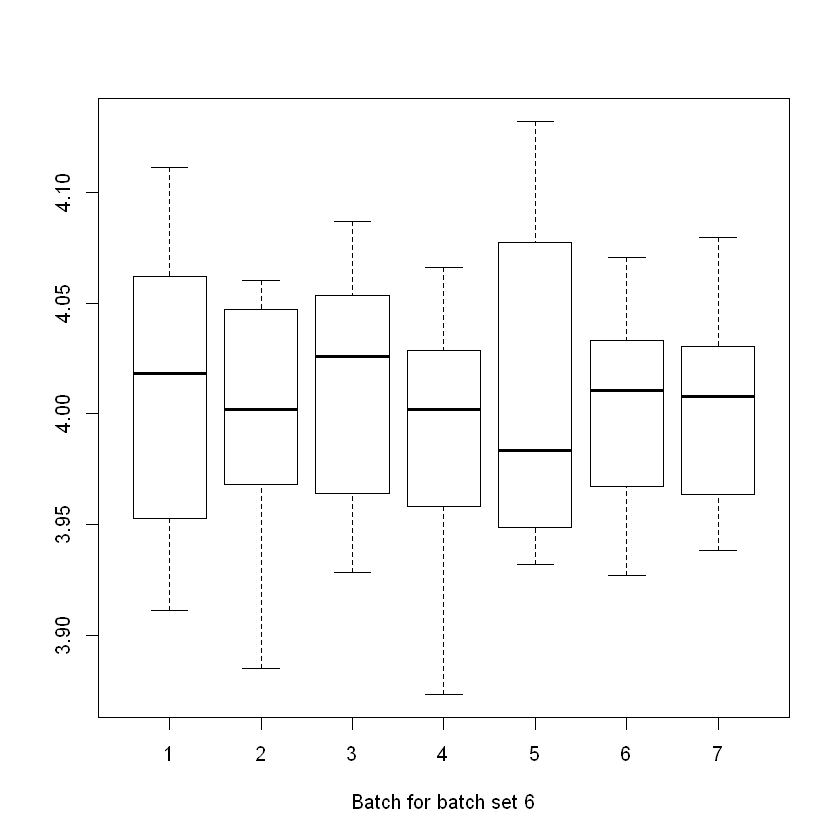

In [1]:
# Problem 12.5.1

n.batches = 7
sample.size = 10

mu = 4.0
sigma = 0.0037

for (i in c(1:6)){
    batches <- matrix(rnorm(n.batches*sample.size, mean = mu, sd = sqrt(sigma)), nrow = sample.size, ncol = n.batches)
    boxplot(batches, xlab = paste("Batch for batch set ", i, sep = ""))
}

In [2]:
# Problem 13.8.1

tableA = data.frame(
Diabetic = rbind(Bborbb = 12., BB = 39),
Normal = rbind(Bborbb = 4., BB = 49))

fcn.chisqtest <- function(tableA){
    cat("\nTwo-Way Table: \n")
    print(tableA)
    
    n.total = sum(as.vector(tableA))
    cat("\n\nTotal counts in table: ", n.total, "\n")
    
    # Compute the marginal probabilities
    probs.TattooStatus = rowSums(tableA)/n.total
    probs.HepCStatus = colSums(tableA)/n.total
    cat("\n\nMLEs of row level probabilities\n")
    print(probs.TattooStatus)
    cat("\n\nMLEs of column level probabilities\n")
    print(probs.HepCStatus)
    
    # Compute table of fitted cell probabilities and expected counts assuming independence of two factors
    tableA.fittedprobs = as.matrix(probs.TattooStatus)%*% t((as.matrix(probs.HepCStatus)))
    cat("\n\nFitted cell probabilities under independence\n")
    print(tableA.fittedprobs)
    
    tableA.expected = n.total * tableA.fittedprobs
    cat("\n\nExpected counts under independence\n")
    print(tableA.expected)
    
    # Compute standardized residuals fitted table
    tableA.chisqresiduals = ((tableA - tableA.expected))/sqrt(tableA.expected)
    cat("\n\nTable of chi-square residuals by cell\n")
    print(tableA.chisqresiduals)
    
    # Compute table of chi-square test statistic contributions
    tableA.chisq = ((tableA - tableA.expected)^2)/tableA.expected
    cat("\n\nTable of chi-square statistics by cell\n")
    print(tableA.chisq)
    
    tableA.chisqStatistic = sum(as.vector(tableA.chisq))
    cat("\n\nChi-Square statistic: ", tableA.chisqStatistic, "\n")
    
    df.tableA = (nrow(tableA) - 1) * (ncol(tableA) - 1)
    cat("\n\nDegrees of freedom: ", df.tableA, "\n")
    
    tableA.chisqStatistic.pvalue = 1 - pchisq(tableA.chisqStatistic, df = df.tableA)
    cat("\n\np-value: ", tableA.chisqStatistic.pvalue, "\n\n")
}

fcn.chisqtest(tableA)


Two-Way Table: 
       Diabetic Normal
Bborbb       12      4
BB           39     49


Total counts in table:  104 


MLEs of row level probabilities
   Bborbb        BB 
0.1538462 0.8461538 


MLEs of column level probabilities
 Diabetic    Normal 
0.4903846 0.5096154 


Fitted cell probabilities under independence
         Diabetic     Normal
Bborbb 0.07544379 0.07840237
BB     0.41494083 0.43121302


Expected counts under independence
        Diabetic    Normal
Bborbb  7.846154  8.153846
BB     43.153846 44.846154


Table of chi-square residuals by cell
         Diabetic    Normal
Bborbb  1.4829346 -1.454686
BB     -0.6323254  0.620280


Table of chi-square statistics by cell
        Diabetic    Normal
Bborbb 2.1990950 2.1161103
BB     0.3998355 0.3847473


Chi-Square statistic:  5.099788 


Degrees of freedom:  1 


p-value:  0.02392877 

